In [2]:
import pymongo as pm
import gridfs

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

from scipy import misc
import os
import time

In [5]:
import jupyter_utils as utils
import importlib
importlib.reload(utils)

<module 'jupyter_utils' from '/home/chengxuz/video_unsup/notebook/jupyter_utils.py'>

In [23]:
conn_7 = pm.MongoClient(port=27007)

# Performance monitor

We show our performance trajectory of VIE-3DResNet below (the first two calls of `utils.show_val_in_tfutils`), aslo as an example of showing model performance when it is trained using tfutils.
The next two calls of `utils.show_val` are examples of showing the direct training trajectories.
We also print out the performance numbers so you can compare your trajectory to ours to confirm whether your training works or not, as you cannot rerun the `utils.show_val_in_tfutils`.

[0.00330822 0.00315554 0.00524226 0.00646376 0.00895766 0.01257125
 0.02921417 0.04178542 0.05725774 0.0685057 ]
[0.08489414 0.0950224  0.09792345 0.11212337 0.11792549 0.12591612
 0.12209895 0.12566164 0.14266083 0.14576547 0.15095684 0.15054968
 0.15818404 0.16373168 0.16617468 0.16200122 0.15523209 0.17146784
 0.17808428 0.1802219  0.18067996 0.18515879 0.18765269 0.18205415
 0.19208062 0.18429357 0.1874491  0.19610138 0.19630496 0.19793363
 0.19803542 0.1994096  0.20042752 0.20709486 0.20872353 0.20648412
 0.21732491 0.21019951 0.20943607 0.21177728 0.21019951 0.2115228
 0.21712133 0.20862174 0.21605252 0.21208265 0.21941164 0.20363396
 0.2211421  0.21472923 0.21478014 0.22027688 0.22322883 0.21757939
 0.21946254 0.21600163 0.21432208 0.22943811 0.22638437 0.22831841
 0.22679153 0.21864821 0.23284812 0.22338152 0.23228827 0.23620725
 0.22541735 0.23462948 0.24017711 0.21905537 0.23737785 0.2332553
 0.23534203 0.23422231 0.24083877 0.2186991  0.22740228 0.24185668
 0.23274633 0.2362

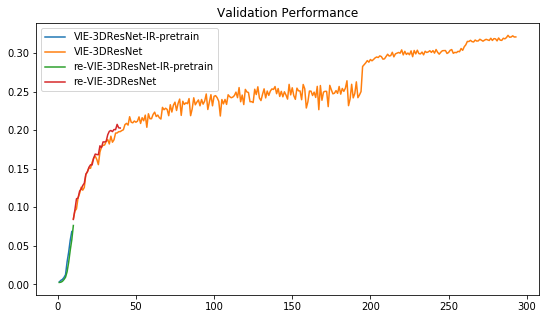

In [48]:
importlib.reload(utils)

kwargs = {
    'key': 'top1_10NN',
    'conn': conn_7,
    'colname': 'dyn_clstr',
    'dbname': 'vd_unsup_fx',
}

curr_expid = 'vd_3dresnet_IR'
print(utils.show_val_in_tfutils(curr_expid, new_figure=True, batch_watch_end=10, label_now='VIE-3DResNet-IR-pretrain', **kwargs)[:10])

curr_expid = 'vd_3dresnet'
print(utils.show_val_in_tfutils(curr_expid, new_figure=False, batch_offset=10, label_now='VIE-3DResNet',  **kwargs))

kwargs = {
    'colname': 'dyn_clstr',
    'dbname': 'vd_unsup_fx',
    'cache_dir': '/mnt/fs4/chengxuz/video_pub_cache/',
    'new_figure': False,
}

curr_expid = 'vd_3dresnet_IR'
utils.show_val(curr_expid, batch_watch_end=11, label_now='re-VIE-3DResNet-IR-pretrain', **kwargs)

curr_expid = 'vd_3dresnet'
utils.show_val(curr_expid, batch_offset=10, label_now='re-VIE-3DResNet',  **kwargs)
pass